In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [39]:
df = pd.read_csv("dataset.csv") 

In [40]:
df.shape

(383, 17)

In [41]:
df.duplicated().sum() # to know number of dup rows

19

In [42]:
df= df.drop_duplicates() #remove duplicate rows

In [37]:
df['Thyroid Function'].value_counts()

Thyroid Function
Euthyroid                      313
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

In [43]:
column_list = df_final.columns.tolist()
print(column_list)


['Age', 'Gender_M', 'Thyroid Function_Clinical Hypothyroidism', 'Thyroid Function_Euthyroid', 'Thyroid Function_Subclinical Hyperthyroidism', 'Thyroid Function_Subclinical Hypothyroidism', 'Physical Examination_Multinodular goiter', 'Physical Examination_Normal', 'Physical Examination_Single nodular goiter-left', 'Physical Examination_Single nodular goiter-right', 'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right', 'Pathology_Hurthel cell', 'Pathology_Micropapillary', 'Pathology_Papillary', 'Focality_Uni-Focal', 'Risk_Intermediate', 'Risk_Low', 'T_T1b', 'T_T2', 'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b', 'N_N1a', 'N_N1b', 'M_M1', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB', 'Response_Excellent', 'Response_Indeterminate', 'Response_Structural Incomplete', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Recurred']


In [80]:
X_train.columns


Index(['Age', 'Gender_F', 'Gender_M',
       'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a',
       'T_T3b', 'T_T4a', 'T_T4b', 'N_N0', 'N_N1a', 'N_N1b', 'M_

In [49]:
yes_no_cols = [col for col in df.columns if set(df[col].dropna().unique()) <= {'Yes', 'No'}]

# Encode Yes/No → 1/0
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

#df['Recurred'] = df['Recurred'].map({'Yes': 1, 'No': 0})




In [50]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0
1,34,F,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
2,30,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
3,62,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
4,62,F,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    int64 
 3   Hx Smoking            364 non-null    int64 
 4   Hx Radiothreapy       364 non-null    int64 
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [52]:
# Columns to One-Hot Encode
categorical_cols = [ 'Gender', 'Thyroid Function', 'Physical Examination', 'Adenopathy',
                    'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

# Initialize encoder
ohe = OneHotEncoder(sparse_output=False)

# Fit + transform
encoded = ohe.fit_transform(df[categorical_cols])

# Get unique column names
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Convert to DataFrame
df_encoded = pd.DataFrame(encoded, columns=encoded_cols, index=df.index).astype(int)

# Build final DataFrame
# 1. Drop all categorical columns
df_remaining = df.drop(columns=categorical_cols)

# 2. Insert encoded columns at the position of the first categorical column
first_idx = df.columns.get_loc(categorical_cols[0])
df_final = pd.concat([
    df_remaining.iloc[:, :first_idx],  # columns before categorical
    df_encoded,                        # encoded columns
    df_remaining.iloc[:, first_idx:]   # columns after categorical
], axis=1)

In [54]:
df_final.head()

,Age,Gender_F,Gender_M,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,...,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Smoking,Hx Smoking,Hx Radiothreapy,Recurred
0,27,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,34,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,30,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,62,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,62,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [55]:
df_final.corr()['Recurred'].sort_values(ascending=False)

Recurred                                            1.000000
Response_Structural Incomplete                      0.861111
N_N1b                                               0.598548
Risk_High                                           0.477985
Risk_Intermediate                                   0.451768
Adenopathy_Bilateral                                0.371792
Focality_Multi-Focal                                0.368581
M_M1                                                0.351161
T_T4a                                               0.344839
Stage_II                                            0.329315
Smoking                                             0.325300
Gender_M                                            0.317731
Adenopathy_Right                                    0.280100
Stage_IVB                                           0.271780
T_T3b                                               0.271450
Age                                                 0.248926
T_T4b                   

In [56]:
df_final.corr()

,Age,Gender_F,Gender_M,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,...,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Smoking,Hx Smoking,Hx Radiothreapy,Recurred
Age,1.000000,-0.177827,0.177827,0.014978,-0.028171,-0.018761,-0.089901,0.096681,-0.027141,0.105338,...,0.141569,0.337099,0.095431,-0.243859,0.045571,0.188448,0.305131,0.129435,0.175602,0.248926
Gender_F,-0.177827,1.000000,-1.000000,-0.033435,0.052059,0.040992,-0.001473,-0.081812,0.068930,-0.081349,...,-0.108500,-0.156103,-0.014640,0.247914,0.016676,-0.292213,-0.618390,-0.170124,-0.233975,-0.317731
Gender_M,0.177827,-1.000000,1.000000,0.033435,-0.052059,-0.040992,0.001473,0.081812,-0.068930,0.081349,...,0.108500,0.156103,0.014640,-0.247914,-0.016676,0.292213,0.618390,0.170124,0.233975,0.317731
Thyroid Function_Clinical Hyperthyroidism,0.014978,-0.033435,0.033435,1.000000,-0.044520,-0.597342,-0.028456,-0.048224,0.405165,0.039495,...,0.111369,0.027860,-0.062621,0.063109,0.020928,-0.055685,0.010869,0.066125,0.141808,-0.077436
Thyroid Function_Clinical Hypothyroidism,-0.028171,0.052059,-0.052059,-0.044520,1.000000,-0.457411,-0.021790,-0.036927,-0.025854,-0.014351,...,-0.016832,-0.032593,0.015289,0.054485,-0.000453,-0.071067,-0.027742,0.004442,-0.025854,-0.052560
Thyroid Function_Euthyroid,-0.018761,0.040992,-0.040992,-0.597342,-0.457411,1.000000,-0.292365,-0.495470,-0.231635,-0.017781,...,-0.138292,0.025022,0.039771,-0.071591,-0.030797,0.086823,-0.003122,-0.121095,-0.058740,0.088918
Thyroid Function_Subclinical Hyperthyroidism,-0.089901,-0.001473,0.001473,-0.028456,-0.021790,-0.292365,1.000000,-0.023603,-0.016525,-0.041749,...,-0.010758,-0.020833,-0.030650,0.113560,-0.052952,-0.068136,-0.046546,0.054509,-0.016525,-0.076653
Thyroid Function_Subclinical Hypothyroidism,0.096681,-0.081812,0.081812,-0.048224,-0.036927,-0.495470,-0.023603,1.000000,-0.028006,0.023887,...,0.139780,-0.035305,0.006775,-0.064883,0.063258,0.016496,0.046685,0.103098,-0.028006,0.026462
Physical Examination_Diffuse goiter,-0.027141,0.068930,-0.068930,0.405165,-0.025854,-0.231635,-0.016525,-0.028006,1.000000,-0.107514,...,-0.012765,-0.024719,-0.036367,0.094704,-0.009270,-0.080845,-0.055228,-0.040423,-0.019608,-0.090951
Physical Examination_Multinodular goiter,0.105338,-0.081349,0.081349,0.039495,-0.014351,-0.017781,-0.041749,0.023887,-0.107514,1.000000,...,0.118729,0.063798,0.034358,-0.171844,0.066642,0.121494,0.047106,0.055822,0.016724,0.148721


In [57]:
X = df_final.drop("Recurred", axis=1)   # replace with your target column name
y = df_final["Recurred"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [59]:
scaler = StandardScaler()
# Fit on TRAIN only
X_train_scaled = scaler.fit_transform(X_train)

# Transform TEST only (NO fit here)
X_test_scaled = scaler.transform(X_test)

#print("Before scaling:", X_train.iloc[1])
#print("After scaling:", X_train_scaled[1])

In [111]:
model = LogisticRegression(
    C=1.0,              # inverse of regularization strength
    solver='lbfgs',     # solver for optimization
    max_iter=200,       # maximum iterations
    random_state=42
)

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [126]:
model = RandomForestClassifier(
    n_estimators=100,    # number of trees
    max_depth=5,         # maximum depth of each tree
    min_samples_split=2, # min samples to split a node
    min_samples_leaf=1,  # min samples at leaf
    max_features='sqrt', # use sqrt(number of features) at each split
    random_state=42
)

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()


In [68]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=150,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

In [69]:
model.fit(X_train_scaled, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [70]:
y_pred = model.predict(X_test_scaled)


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9452054794520548
Confusion Matrix:
 [[48  3]
 [ 1 21]]
Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.88      0.95      0.91        22

    accuracy                           0.95        73
   macro avg       0.93      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



In [72]:
from sklearn.model_selection import cross_val_score,  StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv  = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_prob_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:,1]

# Compute ROC-AUC
roc_auc = roc_auc_score(y, y_prob_cv)
print("Cross-validated ROC-AUC:", roc_auc)

print("Accuracy per fold:", cv_scores)
print("Mean cross-validated accuracy:", cv_scores.mean())

Cross-validated ROC-AUC: 0.9841579861111112
Accuracy per fold: [0.95890411 0.94520548 0.93150685 0.93150685 0.81944444]
Mean cross-validated accuracy: 0.9173135464231356


                                             Feature  Importance
48                    Response_Structural Incomplete    0.338554
46                                Response_Excellent    0.137847
27                                          Risk_Low    0.110329
40                                           Stage_I    0.061007
45                   Response_Biochemical Incomplete    0.042261
47                            Response_Indeterminate    0.037153
36                                             N_N1a    0.033615
26                                 Risk_Intermediate    0.026034
35                                              N_N0    0.020246
41                                          Stage_II    0.020197
2                                           Gender_M    0.016492
30                                              T_T2    0.015010
0                                                Age    0.014191
20                            Pathology_Hurthel cell    0.013328
11   Physical Examination

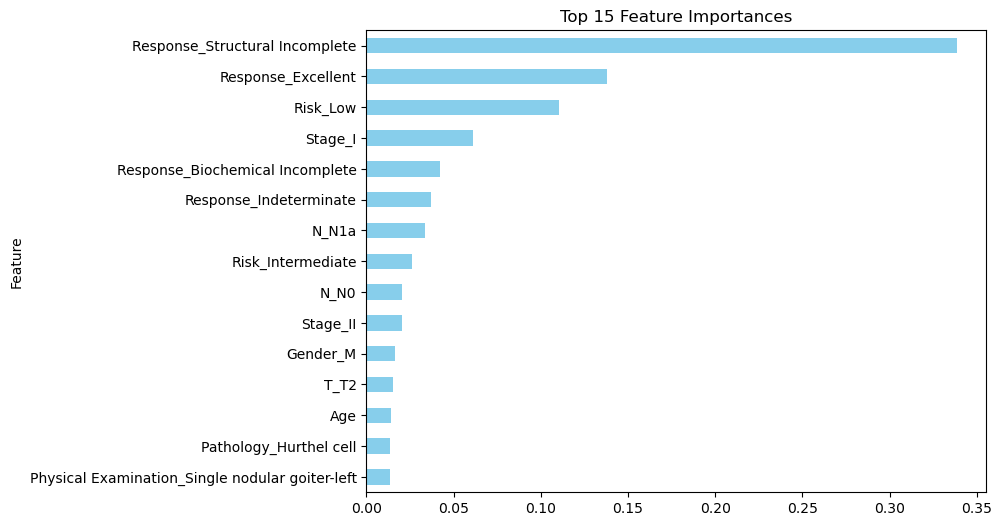

In [73]:
importance = model.feature_importances_
features = X.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print(fi_df)

# Plot top 10 features
fi_df.head(15).plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(8,6), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances")
plt.show()

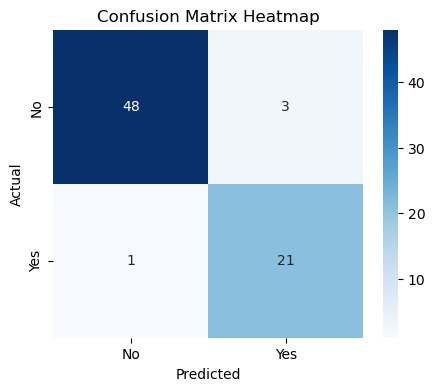

In [74]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


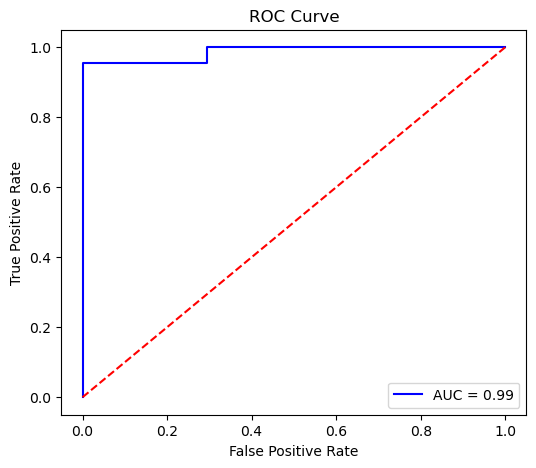

In [75]:
y_prob = model.predict_proba(X_test_scaled)[:,1]  # probability of class 1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [76]:
import joblib

# Suppose your trained model is called 'model'
joblib.dump(model, "model.pkl")  # Save model

# Later, you can load it
loaded_model = joblib.load("model.pkl")

joblib.dump(X_train.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

In [77]:
%%writefile app.py
import streamlit as st

st.title("My First Streamlit App")

name = st.text_input("Enter your name")
if st.button("Submit"):
    st.success(f"Hello, {name}! Welcome to your Streamlit app.")


Overwriting app.py


In [78]:
import os
os.listdir()


['dataset.csv',
 'Thyroid Cancer Detection.pdf',
 'ThyroidCancer.ipynb',
 '.ipynb_checkpoints',
 'model.pkl',
 'model_columns.pkl',
 'app.py']

In [79]:
import os
os.getcwd()


'C:\\Users\\HP\\Google Drive\\My Drive\\thyroid_cancer'